##  Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq
using StaticArrays

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2,  el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [15]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1, k2 = 0.051, 0.051;
el_link = 0.0

condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
condition2 = SA[0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2,  el_link]


p = [a, b, c, d, s, xr, r, I, xv, k1, k2, el_link]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )
ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );

In [16]:
ds_HR1

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, 0.051, 0.051, 0.0]

In [17]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, 0.051, 0.051, 0.0]

In [18]:
tr = trajectory(ds_HR1, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

xsum = tr[:, 1] + tr[:, 4]
xsum = xsum[floor(Int, length(xsum) / 2):end ];
x1 = tr[:, 1]
y1 = tr[:, 2]
z1 = tr[:, 3];
x1 = x1[floor(Int, length(x1) / 2):end ];
y1 = y1[floor(Int, length(y1) / 2):end ];
z1 = z1[floor(Int, length(z1) / 2):end ];

In [19]:
tr1 = trajectory(ds_HR2, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

xsum1 = tr1[:, 1] + tr1[:, 4]
xsum1 = xsum1[floor(Int, length(xsum1) / 2):end ];
x11 = tr1[:, 1]
y11 = tr1[:, 2]
z11 = tr1[:, 3];
x11 = x11[floor(Int, length(x11) / 2):end ];
y11 = y11[floor(Int, length(y11) / 2):end ];
z11 = z11[floor(Int, length(z11) / 2):end ];

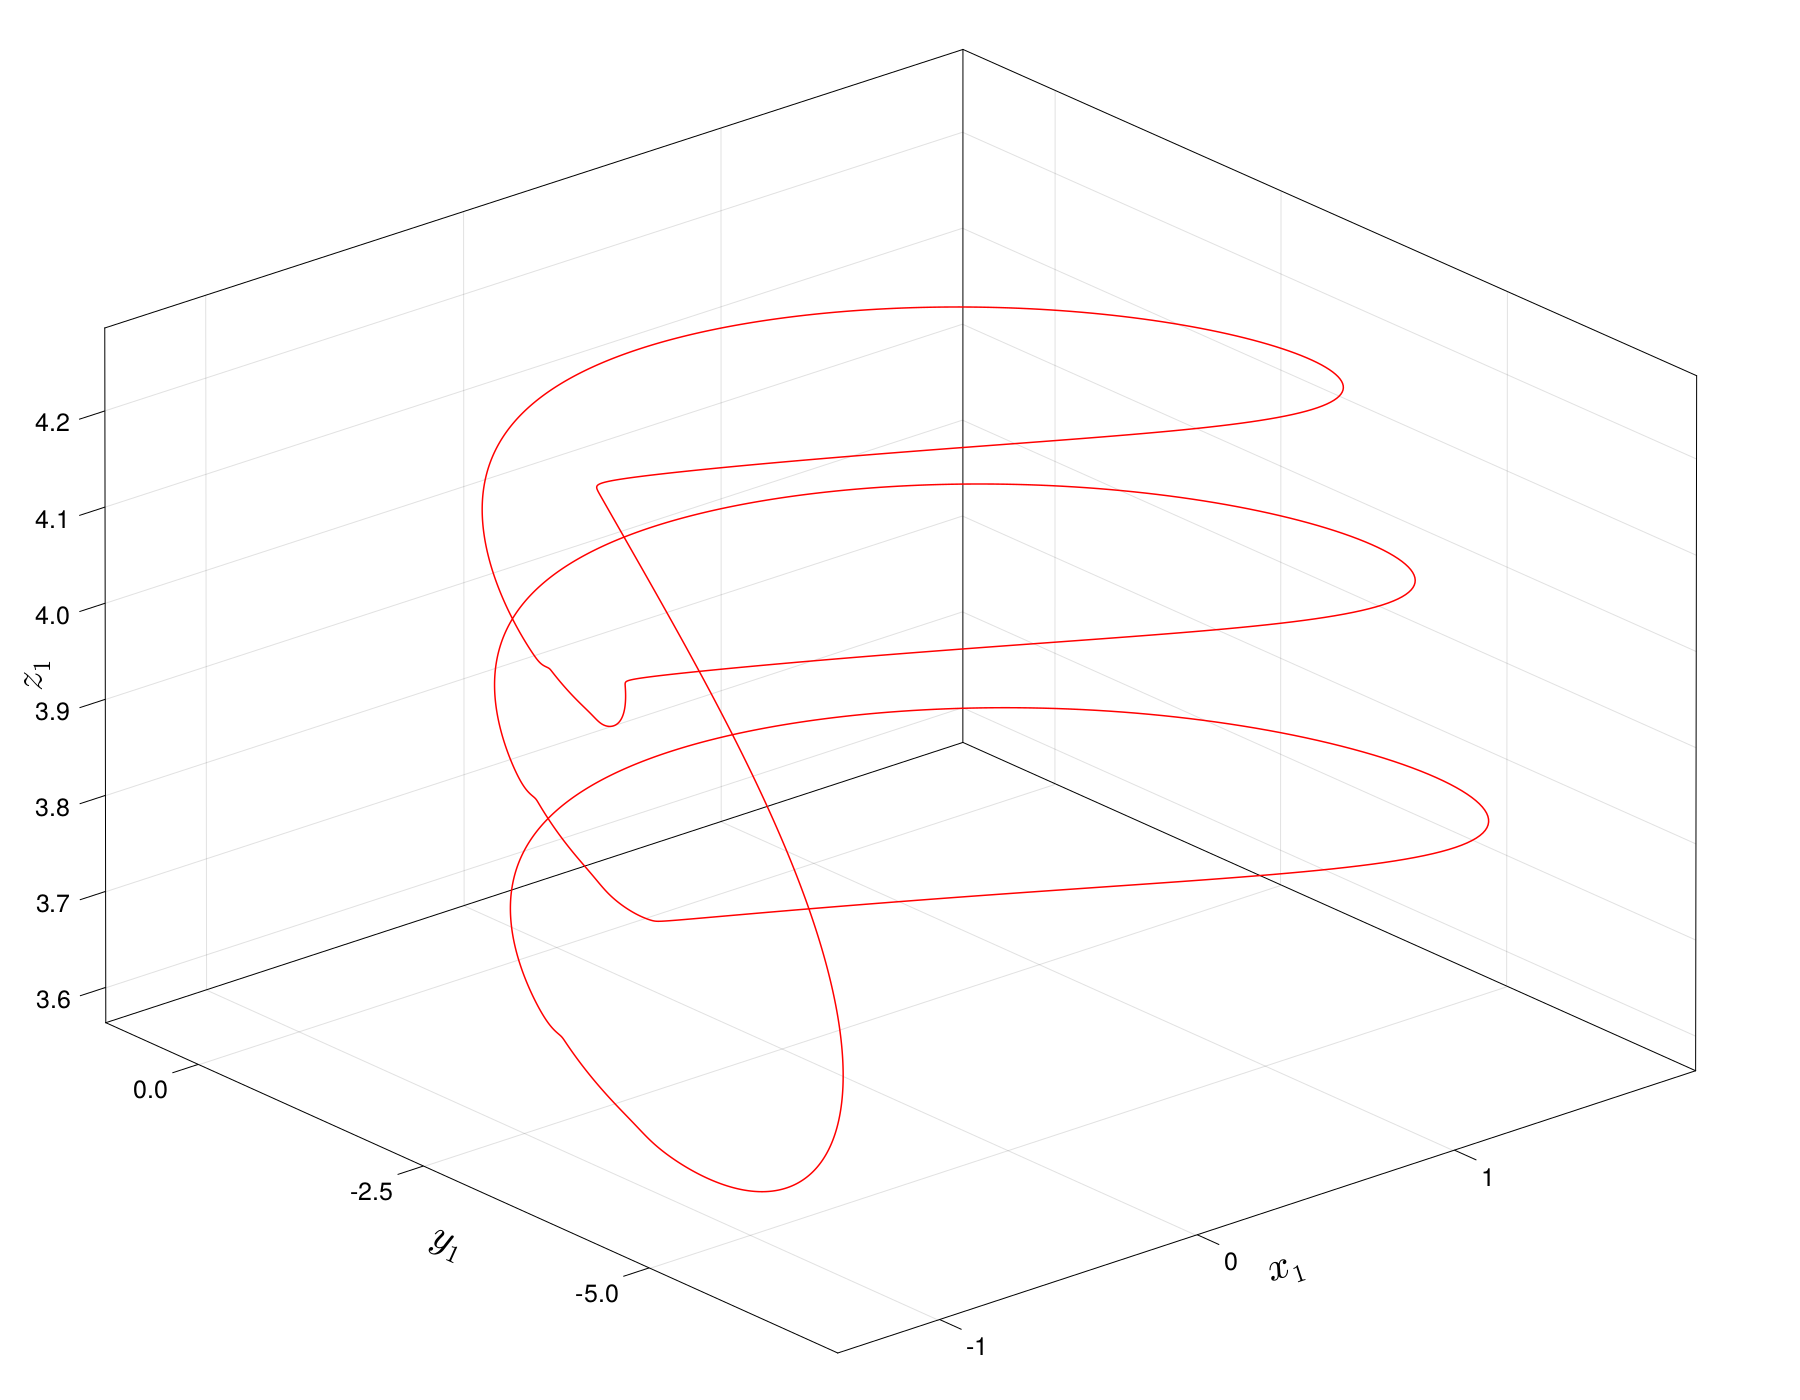

In [20]:
f = Figure(resolution = (1800, 1400))
ts, tf = 1, 200000

ax = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
xlabelsize = 40, ylabelsize = 40, zlabelsize = 40,
                xticklabelsize = 25, yticklabelsize = 25, zticklabelsize = 25  )

lines!(ax, x1[ts:tf], y1[ts:tf], z1[ts:tf], linewidth = 1.5, color = "red" )


f

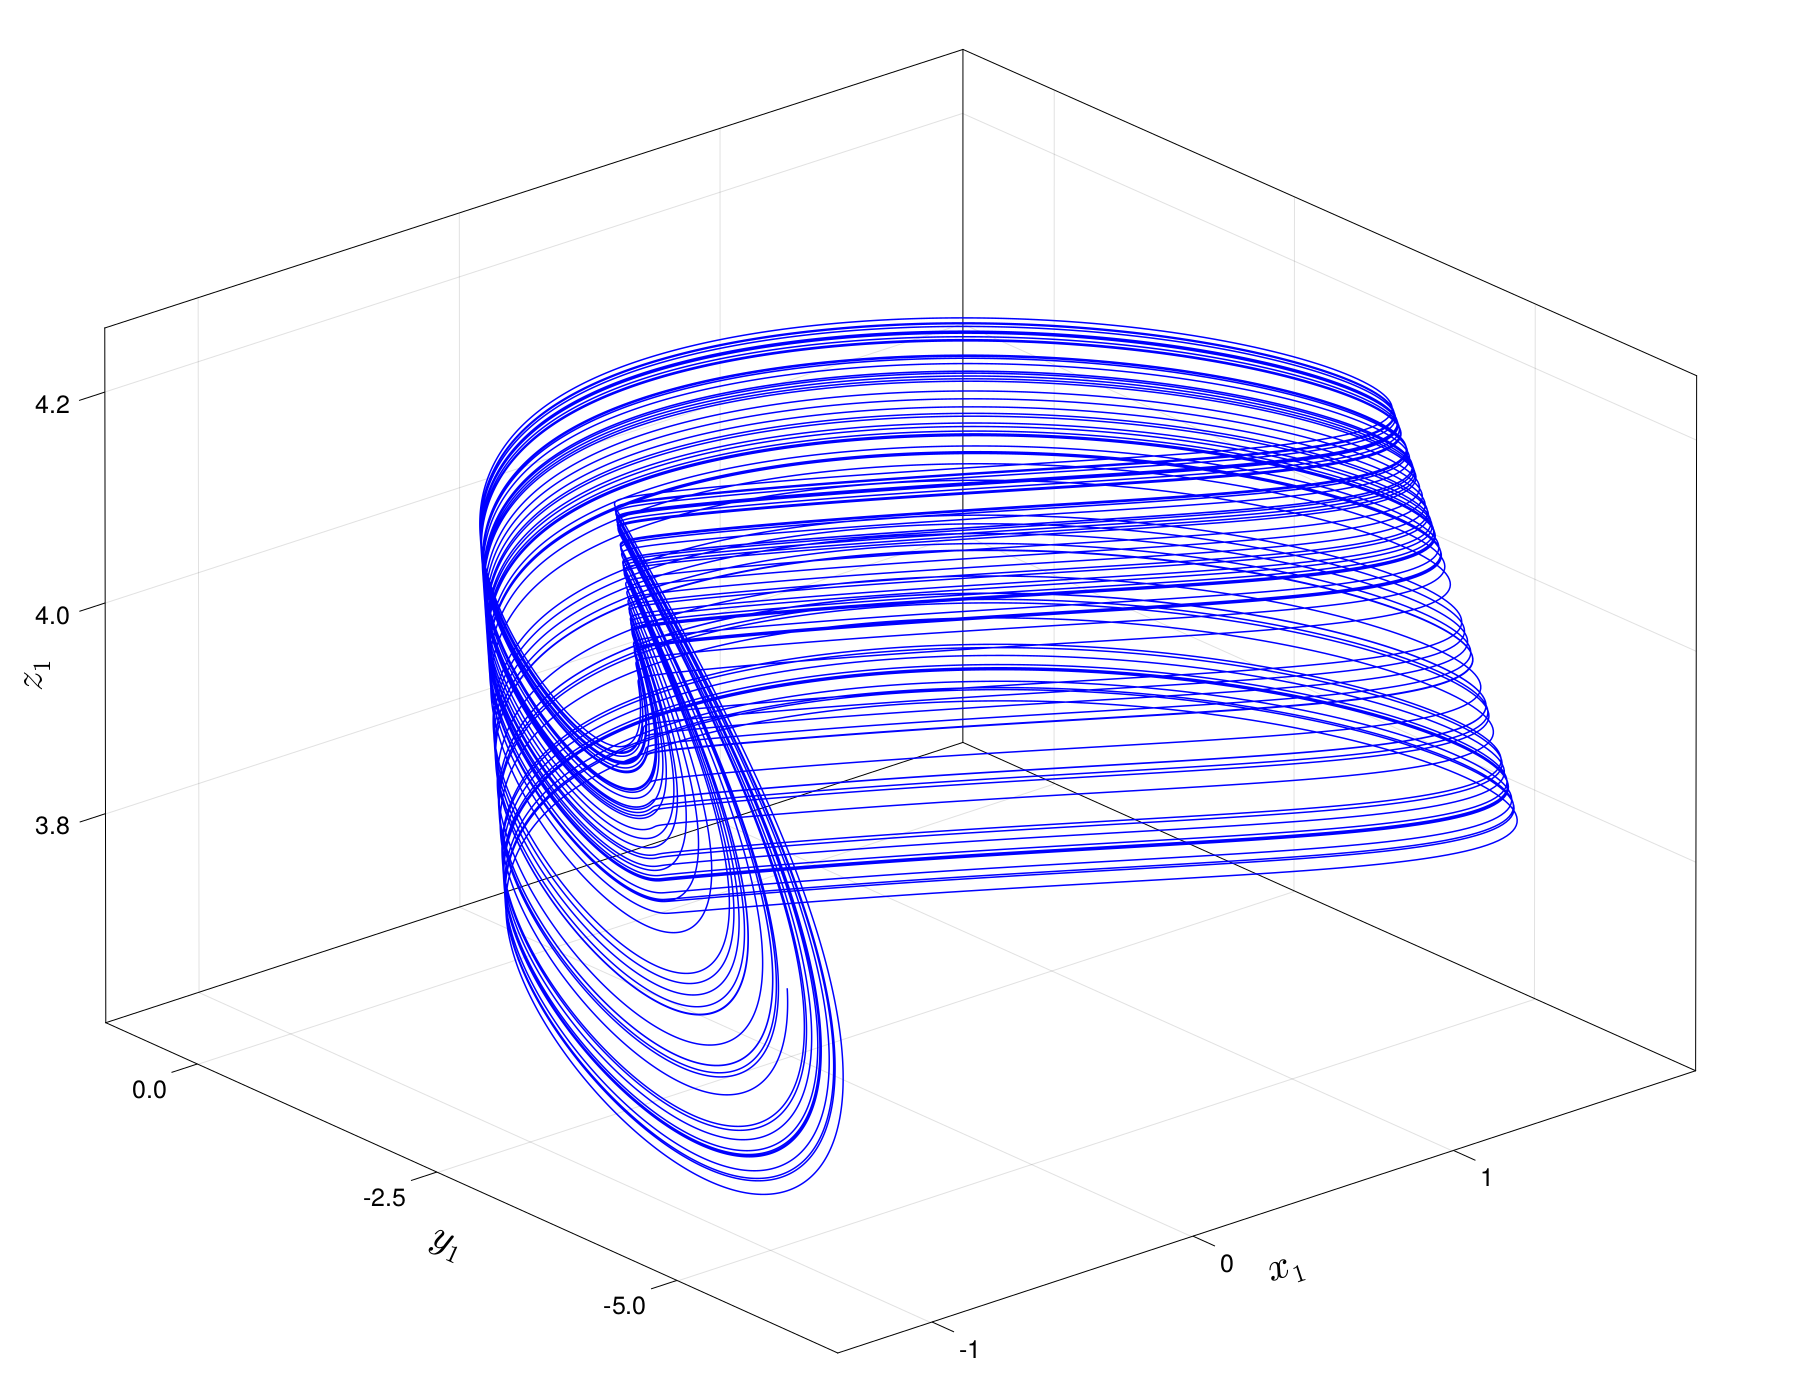

In [21]:
f = Figure(resolution = (1800, 1400))
ts, tf = 1, 200000

ax = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
xlabelsize = 40, ylabelsize = 40, zlabelsize = 40,
                xticklabelsize = 25, yticklabelsize = 25, zticklabelsize = 25  )

lines!(ax, x11[ts:tf], y11[ts:tf], z11[ts:tf], linewidth = 1.5, color = "blue" )


f

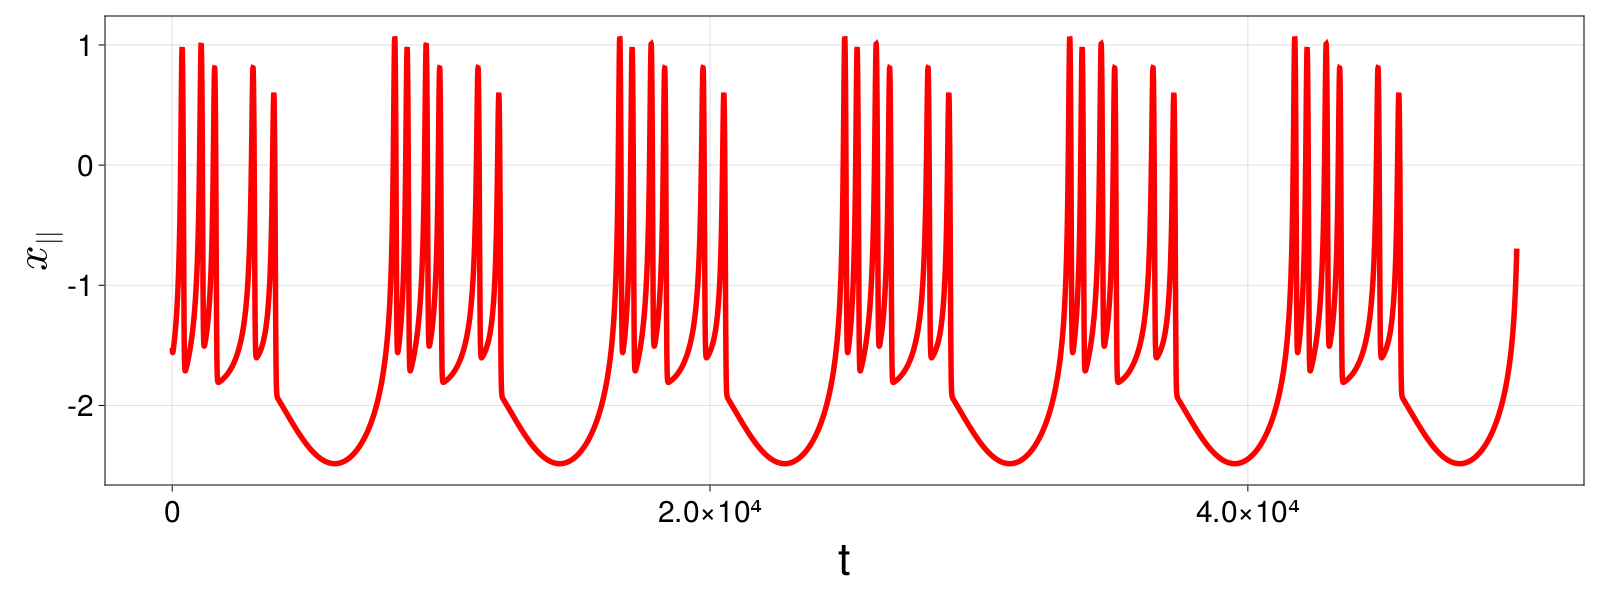

In [22]:
f = Figure(resolution = (1600, 600), fontsize = 35)
ax = Axis(f[1, 1], xlabel = "t", ylabel = L"x_{||}",
xlabelsize = 45, ylabelsize = 45, xticklabelsize = 30, yticklabelsize = 30  )
lines!(xsum[1:50000], linewidth = 5.5, color = "red" )
f

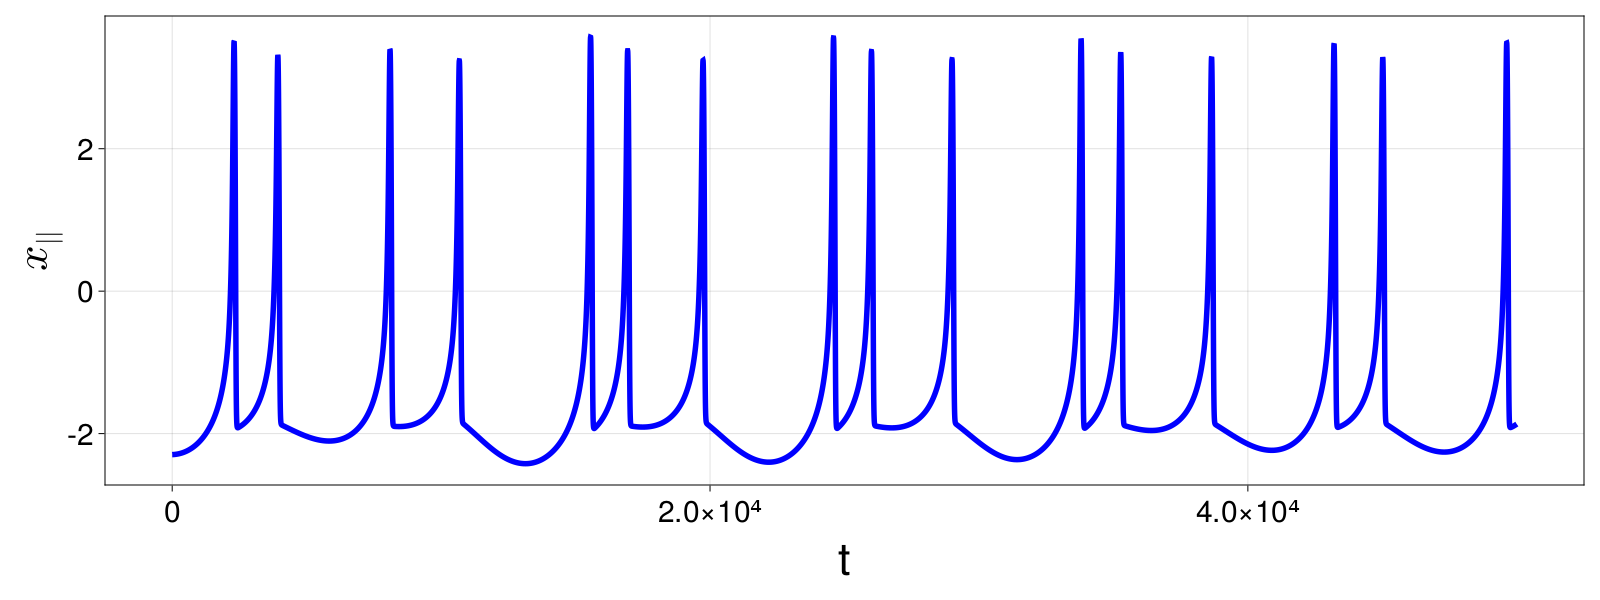

In [23]:
f = Figure(resolution = (1600, 600), fontsize = 35)
ax = Axis(f[1, 1], xlabel = "t", ylabel = L"x_{||}",
xlabelsize = 45, ylabelsize = 45, xticklabelsize = 30, yticklabelsize = 30  )
lines!(xsum1[1:50000], linewidth = 5.5, color = "blue" )
f